In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import math
import seaborn as sns
import IPython.display
pi = math.pi

# custom functions
from phaseshift import phasediff

In [2]:
# sound1, FS1 = librosa.load('data/fold1/7383-3-0-0.wav') # dog
# sound1, FS1 = librosa.load('data/fold1/15564-2-0-0.wav') $ crowd
# sound1, FS1 = librosa.load('data/fold1/17913-4-0-1.wav') # construction
sound1, FS1 = librosa.load('data/fold1/19026-1-0-0.wav') # car horn, good ex of phase diff

wind = 2**11 # in samples
step = 2**9 # in samples
rayleigh = FS1/wind
nyquist = FS1/2
step_sec = step/FS1 # in sec

# freqs = [rayleigh*(i+1) for i in range(round(wind/2))]

ft1 = librosa.stft(sound1, window=scipy.signal.hann, n_fft=wind, hop_length=step, center=0)

psd1 = abs(ft1)**2
db1 = librosa.power_to_db(psd1)

phdiff, psd_rect, times, freqs = phasediff(sound1, windsize=wind, stepsize=step, sampfreq=FS1)

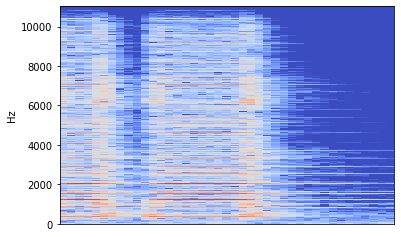

In [3]:
# IPython.display.Audio(data=sound1, rate=FS1)
librosa.display.specshow(db1, y_axis='linear')

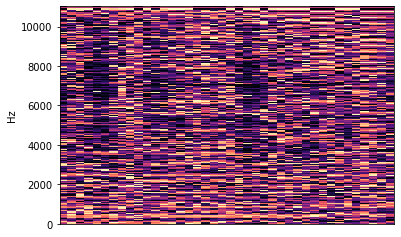

In [4]:
librosa.display.specshow(phdiff, y_axis='linear')